In [1]:
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Machine Learning
from sklearn.cluster import KMeans

# Dataframe

In [2]:
df=pd.read_csv("C:\\Users\\Saravanan\\OneDrive\\Desktop\\Datasets_data\\Tips.csv")

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Observation

# Unsupervised

#Continuous - total_bill, tip
#Category - sex,	smoker,	day,	time,	size


In [4]:
continuous_columns = ["total_bill", "tip"]
category_columns = ["sex",	"smoker",	"day", "time", "size"]

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Statistical Analysis

Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [7]:
# Identify columns with non-numeric data
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to each non-numeric column
for column in non_numeric_columns:
    df = pd.get_dummies(df, columns=[column])

# Now, try calculating the correlation matrix again
correlation_matrix = df.corr()


In [8]:
df.corr()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
total_bill,1.000000,0.675734,0.598315,-0.144877,0.144877,-0.085721,0.085721,-0.086168,0.054919,0.122953,-0.138174,0.183118,-0.183118
tip,0.675734,1.000000,0.489299,-0.088862,0.088862,-0.005929,0.005929,-0.055463,-0.002790,0.125114,-0.095879,0.121629,-0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.086195,0.133178,-0.133178,-0.142184,-0.041121,0.193054,-0.072598,0.103411,-0.103411
sex_Female,-0.144877,-0.088862,-0.086195,1.000000,-1.000000,0.002816,-0.002816,0.071060,-0.053957,-0.168106,0.194445,-0.205231,0.205231
sex_Male,0.144877,0.088862,0.086195,-1.000000,1.000000,-0.002816,0.002816,-0.071060,0.053957,0.168106,-0.194445,0.205231,-0.205231
smoker_No,-0.085721,-0.005929,0.133178,0.002816,-0.002816,1.000000,-1.000000,-0.244316,-0.155744,0.181624,0.128534,-0.054921,0.054921
smoker_Yes,0.085721,0.005929,-0.133178,-0.002816,0.002816,-1.000000,1.000000,0.244316,0.155744,-0.181624,-0.128534,0.054921,-0.054921
day_Fri,-0.086168,-0.055463,-0.142184,0.071060,-0.071060,-0.244316,0.244316,1.000000,-0.216319,-0.195451,-0.169608,-0.058159,0.058159
day_Sat,0.054919,-0.002790,-0.041121,-0.053957,0.053957,-0.155744,0.155744,-0.216319,1.000000,-0.500682,-0.434480,0.462709,-0.462709
day_Sun,0.122953,0.125114,0.193054,-0.168106,0.168106,0.181624,-0.181624,-0.195451,-0.500682,1.000000,-0.392566,0.418071,-0.418071


# Hypothesis Testing

In [9]:
def hypothesisTesting(continuous_columns=[], category_columns=[], sampling_rate=0.20, sampling_frac=0.05):
    # Central Limit Theorem
    oneContinuousColumn_result = {}
    hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
    
    if continuous_columns:
        samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
        for column in continuous_columns:
            population = df[column].values
            population_mean = population.mean()
            sample_mean = []
            for i in range(40):
                sample = np.random.choice(population, samplesize)
                sample_mean.append(sample.mean())
            oneContinuousColumn_result[column] = {
                "Population Mean": population_mean,
                "Sample Means": {np.mean(sample_mean)}
            }

    # 1-Tailed Test
    if continuous_columns:
        samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
        for column in continuous_columns:
            H0_accepted = 0
            H0_rejected = 0
            for i in range(samplesize):
                sample = df[column].sample(frac=sampling_frac)
                t_test, p_value = stats.ttest_1samp(sample, df[column].mean())
                if p_value > 0.5:
                    H0_accepted += 1
                else:
                    H0_rejected += 1

            if H0_accepted > H0_rejected:
                oneContinuousColumn_result[column].update({
                    "H0_accepted": H0_accepted,
                    "H0_rejected": H0_rejected,
                    "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                })
                hypothesis_df.loc[column, column] = "There is a relationship"
            else:
                oneContinuousColumn_result[column].update({
                    "H0_accepted": H0_accepted,
                    "H0_rejected": H0_rejected,
                    "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                })
                hypothesis_df.loc[column, column] = "There is no relationship"

    # 2-Tailed Test
    for i in range(len(continuous_columns) - 1):
        column_1 = continuous_columns[i]
        for column_2 in continuous_columns[i + 1:]:
            H0_accepted = 0
            H0_rejected = 0
            for i in range(20):
                sample1 = df[column_1].sample(frac=sampling_frac)
                sample2 = df[column_2].sample(frac=sampling_frac)
                t_test, p_value = stats.ttest_ind(sample1, sample2)
                if p_value > 0.5:
                    H0_accepted += 1
                else:
                    H0_rejected += 1

            if H0_accepted > H0_rejected:
                hypothesis_df.loc[column_1, column_2] = "There is a relationship"
                hypothesis_df.loc[column_2, column_1] = "There is a relationship"
            else:
                hypothesis_df.loc[column_1, column_2] = "There is no relationship"
                hypothesis_df.loc[column_2, column_1] = "There is no relationship"

    # Chi-Square Test
    if category_columns:
        for i in range(len(category_columns) - 1):
            column_1 = category_columns[i]
            for column_2 in category_columns[i + 1:]:
                data = pd.crosstab(df[column_1], df[column_2])
                observed_values = data.values
                chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

                if p_value > 0.05:
                    hypothesis_df.loc[column_1, column_2] = "There is no relationship"
                    hypothesis_df.loc[column_2, column_1] = "There is no relationship"
                else:
                    hypothesis_df.loc[column_1, column_2] = "There is a relationship"
                    hypothesis_df.loc[column_2, column_1] = "There is a relationship"

    # ANOVA
    if continuous_columns and category_columns:
        for category_column in category_columns:
            for continuous_column in continuous_columns:
                group = df[category_column].unique()
                data = {}
                for i in group:
                    data[i] = df[continuous_column][df[category_column] == i]

                f_value, p_value = stats.f_oneway(*[data[i] for i in group])
                if p_value > 0.05:
                    hypothesis_df.loc[category_column, continuous_column] = "There is a relationship"
                    hypothesis_df.loc[continuous_column, category_column] = "There is a relationship"
                else:
                    hypothesis_df.loc[category_column, continuous_column] = "There is no relationship"
                    hypothesis_df.loc[continuous_column, category_column] = "There is no relationship"

    return oneContinuousColumn_result, hypothesis_df

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df
     

In [ ]:
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

# Machine Learning

In [13]:

wcss = []
for i in range(1,245):
  model = KMeans(i)
  model.fit(df)
  wcss.append(model.inertia_)
print(wcss)

[20440.72983893442, 7403.547497994654, 4217.92466993281, 2766.7318975362978, 2103.44536339757, 1777.1576586921674, 1569.92353152034, 1443.2460245861205, 1240.4250581364327, 1204.8779268523149, 1120.4125399790792, 1123.3702894477804, 1034.932857701678, 972.1925843253966, 991.9084775085056, 952.4680118146124, 897.2493779299139, 859.2462454939687, 849.242784943924, 830.1256680457893, 818.345979843542, 842.4218854520481, 750.2015368179696, 735.7004891315046, 706.6973801393378, 718.4928063464315, 688.8323601384726, 682.9043497848901, 682.7928822906017, 641.5648731747419, 628.3216500259463, 618.2816284279609, 592.7835738529161, 584.7344558499833, 578.5896668476785, 571.1328274575426, 552.0719982516167, 545.0411009325397, 527.0937344821846, 514.6237500185925, 512.2080214590964, 489.8247219907869, 483.7883756493506, 476.91256473026965, 481.81820108585856, 466.3791280494505, 454.4072954563492, 437.59333045093786, 444.1439212698415, 427.2779627777778, 426.0095249755799, 430.1052147258298, 409.28

c:\Users\Saravanan\OneDrive\Desktop\Dataset\.venv\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (243) found smaller than n_clusters (244). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


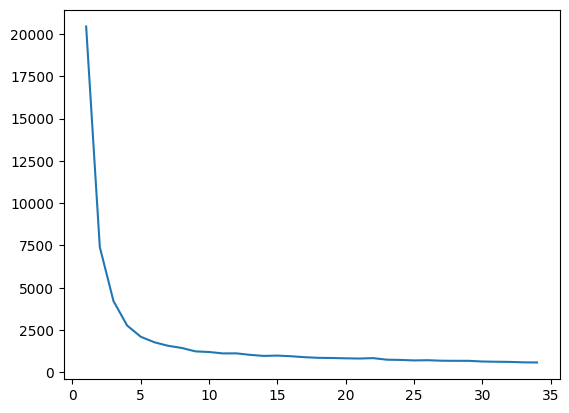

In [14]:
plt.plot(range(1,35), wcss[0:34])
plt.show()

In [15]:
result = KMeans(15).fit(df)

In [16]:

identify_cluster = result.fit_predict(df)
df['cluster'] = identify_cluster

In [17]:

df.cluster.value_counts()

cluster
0     31
13    30
11    25
12    20
7     20
1     17
9     15
5     15
8     14
3     13
6     13
14    12
4     12
2      4
10     3
Name: count, dtype: int64

TypeError: Image data of dtype object cannot be converted to float

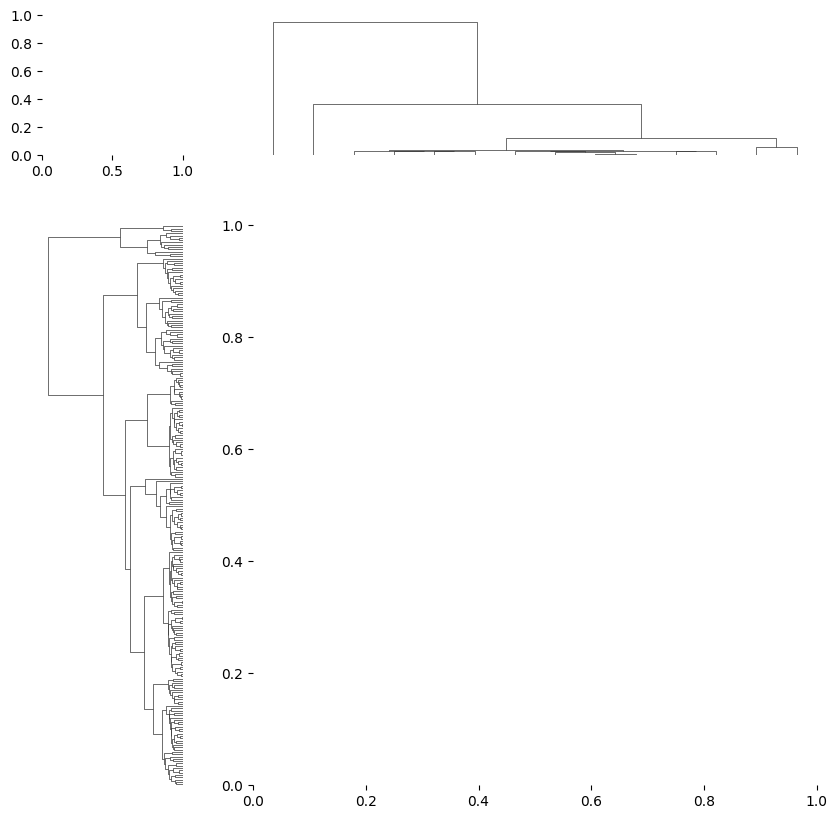

In [18]:
sns.clustermap(df)

In [19]:
df[df['cluster'] == 11]

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,cluster
13,18.43,3.00,4,False,True,True,False,False,False,True,False,True,False,11
17,16.29,3.71,3,False,True,True,False,False,False,True,False,True,False,11
18,16.97,3.50,3,True,False,True,False,False,False,True,False,True,False,11
20,17.92,4.08,2,False,True,True,False,False,True,False,False,True,False,11
25,17.81,2.34,4,False,True,True,False,False,True,False,False,True,False,11
31,18.35,2.50,4,False,True,True,False,False,True,False,False,True,False,11
34,17.78,3.27,2,False,True,True,False,False,True,False,False,True,False,11
37,16.93,3.07,3,True,False,True,False,False,True,False,False,True,False,11
38,18.69,2.31,3,False,True,True,False,False,True,False,False,True,False,11
41,17.46,2.54,2,False,True,True,False,False,False,True,False,True,False,11


In [20]:
pd.set_option('display.max_rows',None)
df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,cluster
0,16.99,1.01,2,True,False,True,False,False,False,True,False,True,False,13
1,10.34,1.66,3,False,True,True,False,False,False,True,False,True,False,12
2,21.01,3.50,3,False,True,True,False,False,False,True,False,True,False,7
3,23.68,3.31,2,False,True,True,False,False,False,True,False,True,False,1
4,24.59,3.61,4,True,False,True,False,False,False,True,False,True,False,1
5,25.29,4.71,4,False,True,True,False,False,False,True,False,True,False,1
6,8.77,2.00,2,False,True,True,False,False,False,True,False,True,False,14
7,26.88,3.12,4,False,True,True,False,False,False,True,False,True,False,8
8,15.04,1.96,2,False,True,True,False,False,False,True,False,True,False,13
9,14.78,3.23,2,False,True,True,False,False,False,True,False,True,False,13
